In [39]:
#Importing libraries
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings; 
from sklearn.preprocessing import LabelEncoder

In [3]:
#reading csv
df = pd.read_csv("/Users/loanple/Desktop/Fall 2020/5700/Midterm/CSV_Midterm assignment data set.csv")

# Initial EDA

### Understanding Dataset

In [5]:
#Reviewing columns, rows, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
Over18                

In [6]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,3,4,1,6,3,3,2,2,2,2


In [7]:
# Number of unique values in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [54]:
#Reviewing count in each department
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

## Reviewing Key Metrics by Department

In [74]:
temp1 = df.groupby(["Department","Attrition"]).agg({'Attrition': 'count'})
eg = df.groupby(['Department']).agg({'Attrition': 'count'})

print("Percent within each department for Attrition:")
(temp1.div(eg, level='Department') * 100).round(2)

Percent within each department for Attrition:


Attrition
Department             Attrition           
Human Resources        No             80.95
                       Yes            19.05
Research & Development No             86.16
                       Yes            13.84
Sales                  No             79.37
                       Yes            20.63

In [75]:
temp1 = df.groupby(["PerformanceRating","Attrition"]).agg({'Attrition': 'count'})
eg = df.groupby(['PerformanceRating']).agg({'Attrition': 'count'})

print("Attrition & Performance Rating:")
(temp1.div(eg, level='PerformanceRating') * 100).round(2)

Attrition & Performance Rating:


Attrition
PerformanceRating Attrition           
3                 No             83.92
                  Yes            16.08
4                 No             83.63
                  Yes            16.37

In [80]:
temp1 = df.groupby(["Department","WorkLifeBalance"]).agg({'WorkLifeBalance': 'count'})
eg = df.groupby(['Department']).agg({'WorkLifeBalance': 'count'})

print("Work Life Balance by Department:")
(temp1.div(eg, level='Department') * 100).round()

Work Life Balance by Department:


WorkLifeBalance
Department             WorkLifeBalance                 
Human Resources        1                            6.0
                       2                           11.0
                       3                           67.0
                       4                           16.0
Research & Development 1                            6.0
                       2                           24.0
                       3                           60.0
                       4                            9.0
Sales                  1                            4.0
                       2                           23.0
                       3                           62.0
                       4                           12.0

In [81]:
print("AVG Work Life Balance Score by Department:")
df.groupby(["Department"]).agg({'WorkLifeBalance': 'mean'}).round(2)

Mean Work Life Balance Score by Department:


,WorkLifeBalance
Department,
Human Resources,2.92
Research & Development,2.73
Sales,2.82


In [84]:
print("AVG Job Satisfaction within Department:")
df.groupby(["Department"]).agg({'JobSatisfaction': 'mean'}).round(2)

AVG Job Satisfaction within Department:


,JobSatisfaction
Department,
Human Resources,2.60
Research & Development,2.73
Sales,2.75


In [85]:
print("AVG Rls Satisfaction within Department:")
df.groupby(["Department"]).agg({'RelationshipSatisfaction': 'mean'}).round(2)

AVG Rls Satisfaction within Department:


,RelationshipSatisfaction
Department,
Human Resources,2.89
Research & Development,2.71
Sales,2.70


## Subsetting departments

### R&D subset

In [16]:
#R&D subset
rd_df = df[df["Department"]=="Research & Development"]
print("rows:", rd_df.shape[0],"\ncolumns:", rd_df.shape[1])

rows: 961 
columns: 31


In [37]:
rd_df.PercentSalaryHike.describe().round(2)

count    961.00
mean      15.29
std        3.70
min       11.00
25%       12.00
50%       14.00
75%       18.00
max       25.00
Name: PercentSalaryHike, dtype: float64

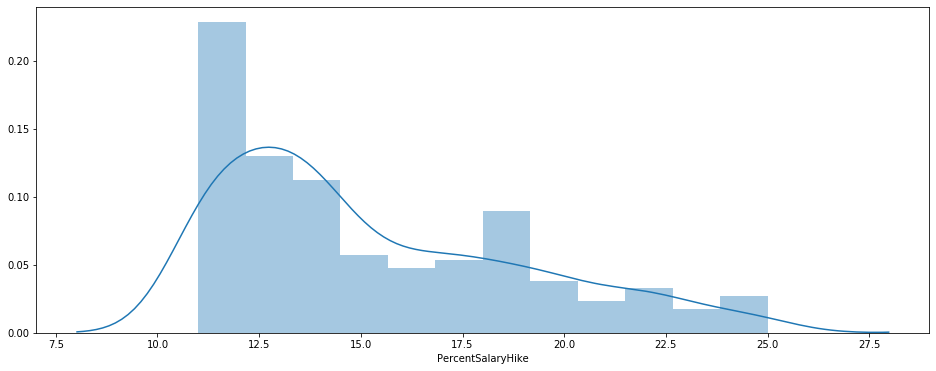

In [42]:
plt.figure(figsize=(16,6))
sns.distplot(rd_df['PercentSalaryHike'])

PerformanceRating

In [41]:
rd_df.PerformanceRating.describe().round(2)

count    961.00
mean       3.16
std        0.37
min        3.00
25%        3.00
50%        3.00
75%        3.00
max        4.00
Name: PerformanceRating, dtype: float64

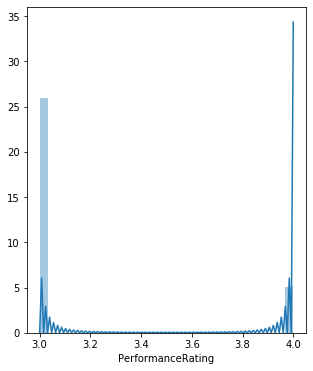

In [46]:
plt.figure(figsize=(5,6))
sns.distplot(rd_df['PerformanceRating'])

In [53]:
rd_df.YearsAtCompany.describe().round(2)

count    961.00
mean       6.86
std        6.02
min        0.00
25%        3.00
50%        5.00
75%        9.00
max       40.00
Name: YearsAtCompany, dtype: float64

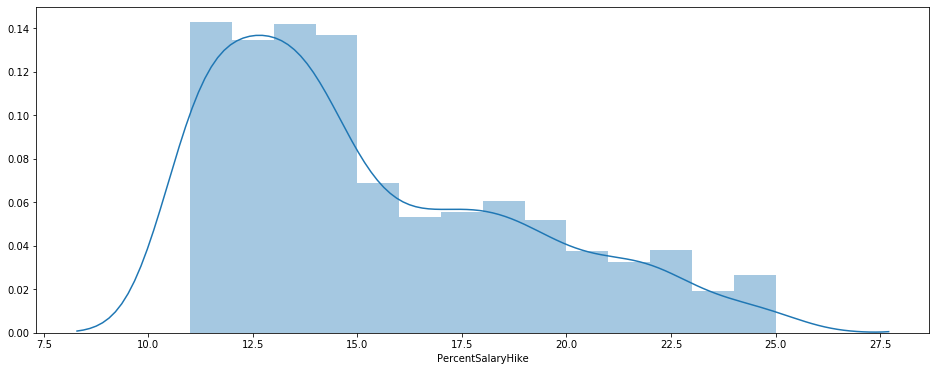

In [76]:
plt.figure(figsize=(16,6))
sns.distplot(df['PercentSalaryHike'])

### Sales subset

In [17]:
#Sales subset
sales_df = df[df["Department"]=="Sales"]
print("rows:", sales_df.shape[0],"\ncolumns:", sales_df.shape[1])

rows: 446 
columns: 31


In [86]:
temp1 = sales_df.groupby(["JobRole","Attrition"]).agg({'Attrition': 'count'})
eg = sales_df.groupby(['JobRole']).agg({'Attrition': 'count'})

print("Attrition by Job Role:")
(temp1.div(eg, level='JobRole') * 100).round()

Attrition by Job Role:


Attrition
JobRole              Attrition           
Manager              No              95.0
                     Yes              5.0
Sales Executive      No              83.0
                     Yes             17.0
Sales Representative No              60.0
                     Yes             40.0

### HR subset

In [18]:
#HR
hr_df = df[df["Department"]=="Human Resources"]
print("rows:", hr_df.shape[0],"\ncolumns:", hr_df.shape[1])

rows: 63 
columns: 31
